---
title: "Impact of double axis in data display"
subtitle: "How using double axis can change the message of a plot."
author: Marco Dalla Vecchia
date: 12/06/2024
---

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Aesthetics
sns.set_style('ticks')
plt.rcParams["font.family"] = "serif" # use Serif style as default font

In [8]:
# Import World Bank population data for Austria and China
df = (
    pd.read_csv('../data/API_SP.POP.TOTL_DS2_en_csv_v2_320414/API_SP.POP.TOTL_DS2_en_csv_v2_320414.csv', skiprows=3)
    .drop(columns=['Indicator Code', 'Indicator Name', '2023', 'Unnamed: 68'])
    .melt(id_vars=['Country Name','Country Code'])
    .rename({'Country Name':'country-name', 'Country Code':'country-code', 'variable':'year', 'value': 'population'}, axis=1)
    .assign(year=lambda df_: pd.to_numeric(df_.year))
    .loc[lambda df_: df_['country-name'].isin(['Austria','China'])]
    .reset_index(drop=True)
)

country-name country-code  year    population
0        Austria          AUT  1960  7.047539e+06
1          China          CHN  1960  6.670700e+08
2        Austria          AUT  1961  7.086299e+06
3          China          CHN  1961  6.603300e+08
4        Austria          AUT  1962  7.129864e+06
..           ...          ...   ...           ...
121        China          CHN  2020  1.411100e+09
122      Austria          AUT  2021  8.955797e+06
123        China          CHN  2021  1.412360e+09
124      Austria          AUT  2022  9.041851e+06
125        China          CHN  2022  1.412175e+09

[126 rows x 4 columns]

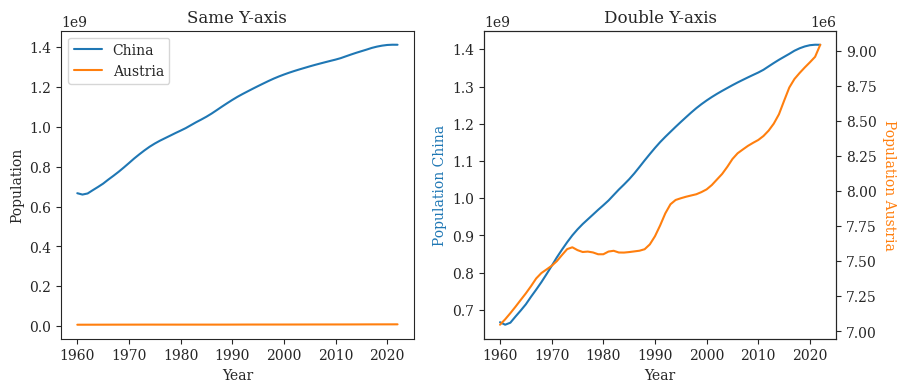

In [47]:
#| label: fig-double-axis
#| fig-cap: "Visual effect of using double Y-axis on data of different scales."

fig= plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(df.loc[df['country-name'] == 'China']['year'], df.loc[df['country-name'] == 'China']['population'], label='China')
ax1.plot(df.loc[df['country-name'] == 'China']['year'], df.loc[df['country-name'] == 'Austria']['population'], label='Austria')
ax1.set(xlabel="Year", ylabel='Population')
ax1.legend()

ax2_twin = ax2.twinx()
ax2.plot(df.loc[df['country-name'] == 'China']['year'], df.loc[df['country-name'] == 'China']['population'], c='tab:blue')
ax2_twin.plot(df.loc[df['country-name'] == 'China']['year'], df.loc[df['country-name'] == 'Austria']['population'], c='tab:orange')
ax2.set_xlabel("Year")
ax2.set_ylabel('Population China', color='tab:blue')
ax2_twin.set_ylabel('Population Austria', rotation=-90, va='bottom', color='tab:orange')

ax1.set_title('Same Y-axis')
ax2.set_title('Double Y-axis')
fig.savefig('../figures/double-axis.pdf', bbox_inches='tight')
plt.show()